In [1]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,Dense,Flatten,concatenate,AveragePooling2D,SeparableConv2D,DepthwiseConv2D,GlobalAveragePooling2D
import numpy
from sklearn.model_selection import GridSearchCV,train_test_split

Using TensorFlow backend.


In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest=xtest.reshape(xtest.shape[0],28,28,1)
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain=xtrain/255.0
xtest=xtest/255.0
inputs=Input((28,28,1))

In [0]:
ytrain=keras.utils.to_categorical(ytrain,10)
ytest=keras.utils.to_categorical(ytest,10)

In [0]:
def create_model():
  lay1=Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(inputs)
  lay1=Conv2D(2,kernel_size=(7,7),strides=(2,2),activation='relu',padding='same')(lay1)
  lay1=Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(lay1)
  lay1=MaxPooling2D(pool_size=(7,7),strides=(2,2),padding='same')(lay1)
  lay2=Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(inputs)
  lay2=Conv2D(4,kernel_size=(7,7),strides=(2,2),activation='relu',padding='same')(lay2)
  lay2=Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(lay2)
  lay2=MaxPooling2D(pool_size=(7,7),strides=(2,2),padding='same')(lay2)
  lay3=Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(inputs)
  lay3=Conv2D(6,kernel_size=(7,7),strides=(2,2),activation='relu',padding='same')(lay3)
  lay3=Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(lay3)
  lay3=MaxPooling2D(pool_size=(7,7),strides=(2,2),padding='same')(lay3)
  fc=concatenate([lay1,lay2])
  #fc=GlobalAveragePooling2D()(fc)
  fc=Flatten()(lay3)
  fc=Dense(10,activation='relu')(fc)
  outputs=Dense(10,activation='softmax')(fc)
  model=Model(input=inputs,output=outputs)
  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
  return model

In [0]:
#xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,train_size=0.7,random_state=0)

In [7]:
numpy.random.seed(0)
model=create_model()
print(model.summary())
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')]
model.fit(xtrain, ytrain,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(xtest, ytest),callbacks=callbacks)





Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 2)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 4)    8           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 2)    198         conv2d_1[0][0]                   
________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 458us/step - loss: 0.5530 - acc: 0.8200 - val_loss: 0.2081 - val_acc: 0.9367
Epoch 2/10
60000/60000 [==============================] - 21s 342us/step - loss: 0.2051 - acc: 0.9374 - val_loss: 0.1481 - val_acc: 0.9526
Epoch 3/10
60000/60000 [==============================] - 21s 342us/step - loss: 0.1600 - acc: 0.9503 - val_loss: 0.1336 - val_acc: 0.9590
Epoch 4/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.1378 - acc: 0.9565 - val_loss: 0.1179 - val_acc: 0.9638
Epoch 5/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.1256 - acc: 0.9605 - val_loss: 0.1115 - val_acc: 0.9642
Epoch 6/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.1163 - acc: 0.9634 - val_loss: 0.1069 - val_acc: 0.9683
Epoch 7/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.1110 - acc: 0.9642 - val_loss: 0

In [8]:
score = model.evaluate(xtest, ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08151113466592505
Test accuracy: 0.9742


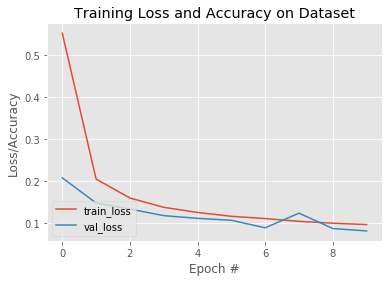

In [9]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(numpy.arange(0, 10), model.history.history["loss"], label="train_loss")
plt.plot(numpy.arange(0, 10), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()